In [1]:
from __future__ import print_function
__author__ = 'acs2w'

import pylab as pl
import seaborn
import numpy as np
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Chi-Squared Distribution

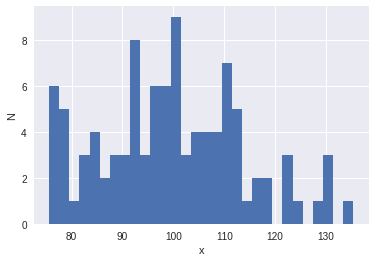

In [2]:
distributions = ['chisq']
mymean = 100
df = mymean
md = {}
np.random.seed(100)
md ['chisq'] = np.random.chisquare(df, size=100)
pl.hist(md['chisq'], bins=30)
pl.ylabel('N')
pl.xlabel('x')

In [3]:
print ("Chisq mean: %.2f, standard deviation: %.2f"\
       %(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.87, standard deviation: 14.07


In [4]:
mysize = (2000 / (np.array(range(1,100)))).astype(int)
print(mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


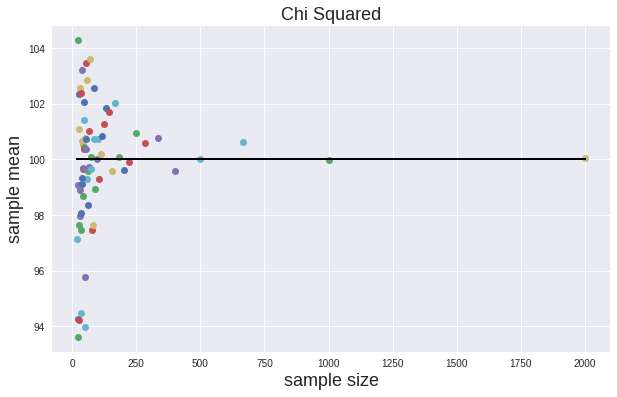

In [5]:
md['chisq'] = {}

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size=n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi Squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[df,df],'k')

**Figure:** Given smaller sample sizes in the above graph, we see a lot of variation at the left-hand side. However, we still see a clear shift towards the mean as sample sizes increase. 

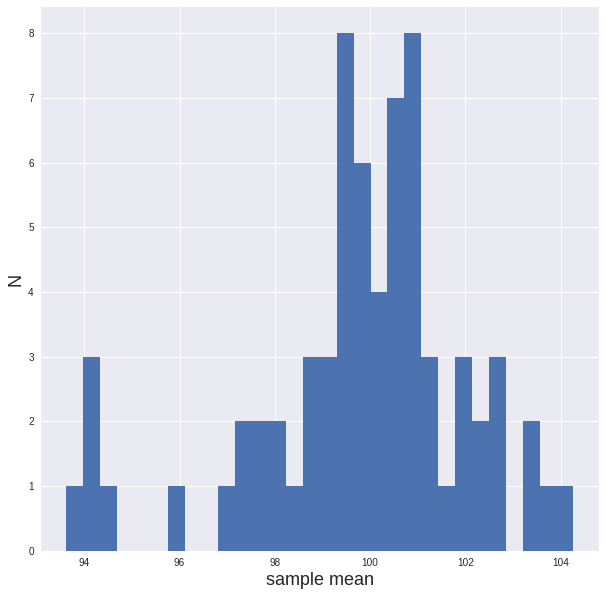

In [6]:
chimeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(chimeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

**Figure:** While there is a fairly large spread around the mean, the samples have the highest frequency around 100, conforming to the law of large numbers. 

# Normal Distribution

Normal mean: 99.90, standard deviation: 0.97


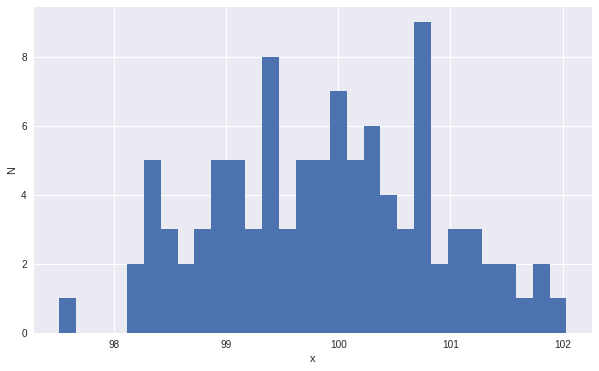

In [7]:
distributions.append('normal')
mymean = 100
loc = mymean
np.random.seed(100)
md ['normal'] = np.random.normal(loc, size=100)
pl.hist(md['normal'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Normal mean: %.2f, standard deviation: %.2f"\
       %(md['normal'].mean(), md['normal'].std()))

In [8]:
mysize = 1000 / (np.array(range(1, 100) + [10]))
print (mysize, mysize.shape)

[1000  500  333  250  200  166  142  125  111  100   90   83   76   71   66
   62   58   55   52   50   47   45   43   41   40   38   37   35   34   33
   32   31   30   29   28   27   27   26   25   25   24   23   23   22   22
   21   21   20   20   20   19   19   18   18   18   17   17   17   16   16
   16   16   15   15   15   15   14   14   14   14   14   13   13   13   13
   13   12   12   12   12   12   12   12   11   11   11   11   11   11   11
   10   10   10   10   10   10   10   10   10  100] (100,)


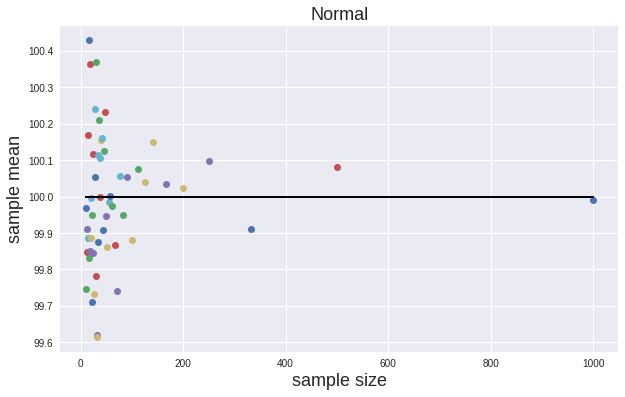

In [9]:
md['normal'] = {}

for n in mysize:
    md['normal'][n] = np.random.normal(loc, size=n)

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        axchisq_mu_n.plot(nn, md['normal']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[loc,loc],'k')

**Figure:** A much more constrained graph than chi-squared, wiht no means over 0.5 away from the true mean. We observe them getting even closer with large samples.

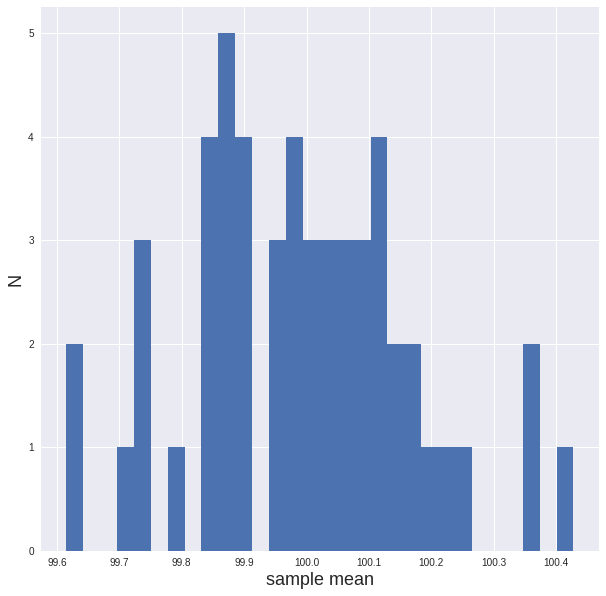

In [10]:
normmeans = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(normmeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

**Figure:** A much more constrained graph than chi-squared, wiht no means over 0.5 away from the true mean. We see the largest spike at 0.1 away from the true mean, but this is due to noise and we obviously see the law of large numbers strongly at work here.

# Poisson Distribution

Poisson mean: 98.26, standard deviation: 8.95


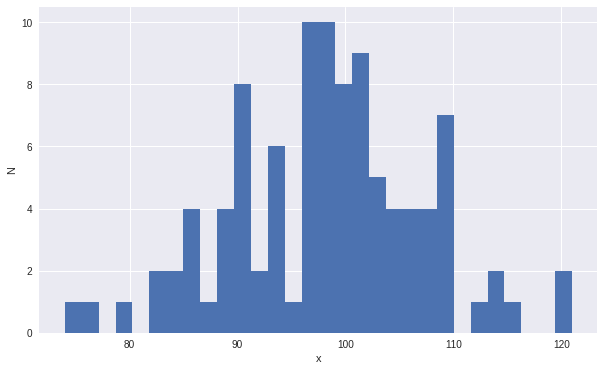

In [11]:
distributions.append('poisson')
mymean = 100
lam = mymean
np.random.seed(100)
md ['poisson'] = np.random.poisson(lam, size=100)
pl.hist(md['poisson'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Poisson mean: %.2f, standard deviation: %.2f"\
       %(md['poisson'].mean(), md['poisson'].std()))

In [12]:
mysize = (np.random.rand(100) * 1000).astype(int)

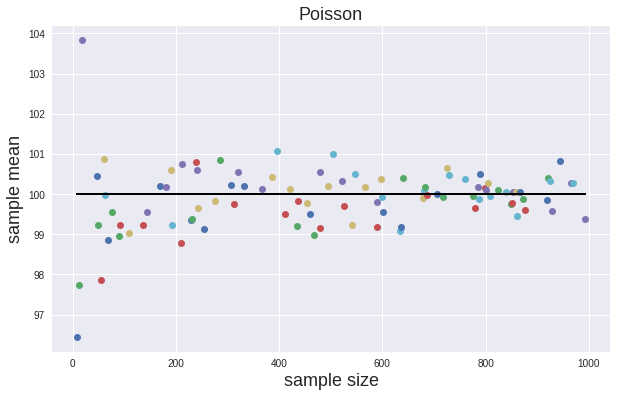

In [13]:
md['poisson'] = {}

for n in mysize:
    md['poisson'][n] = np.random.poisson(lam, size=n)

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[lam,lam],'k')

**Figure:** We see wide variation at the begining, a quick jump to conformity around the mean, and a gradual, but not definite hovering around the mean as numbers get larger. All still within about one of the true mean though.

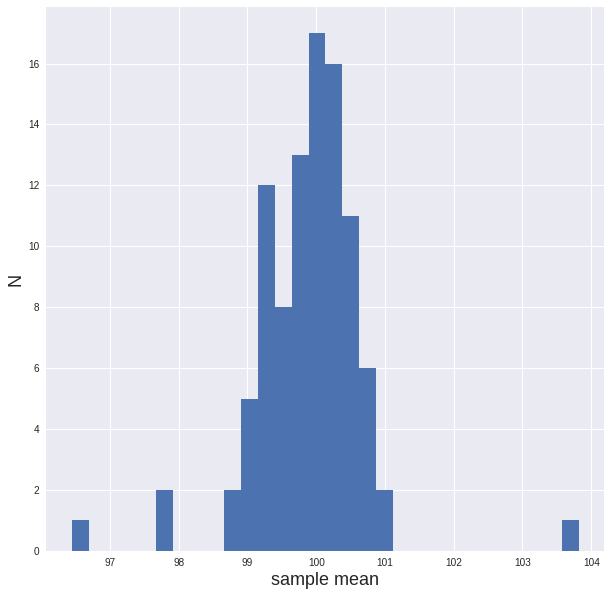

In [14]:
poismeans = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(poismeans,bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

**Figure:** A large bunch around the mean indicates conformance with the law of large numbers.

# Binomial Distribution

Binomial mean: 101.10, standard deviation: 6.42


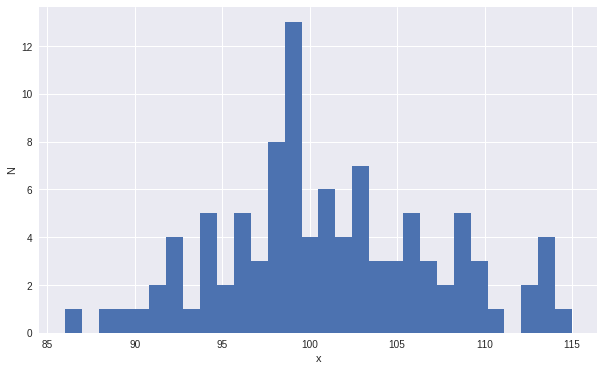

In [15]:
distributions.append('binomial')
mymean = 100
num, p = 200, .5
np.random.seed(100)
md ['binomial'] = np.random.binomial(num, p, size=100)
pl.hist(md['binomial'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Binomial mean: %.2f, standard deviation: %.2f"\
       %(md['binomial'].mean(), md['binomial'].std()))

In [16]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[965 779 239 867 808  63 231 589 137 678 992 285 760  46 332 944 636 601
 928 181  17 190 521 495 800 859 212 437 421  54   9 789 275 717 421 143
 192 313 805  12  49 566 686 726 479 367 839 454 321  92  60  90 682 680
 243 640  69 872 109 169 467 775 854 210  76 788 547 786 920 480 459 598
 599 504 306 541 924 970 395 798 635 229  51  28 122 220 829 285 781 504
 138 778 921 943 704 693 546 369 982  65] (100,)


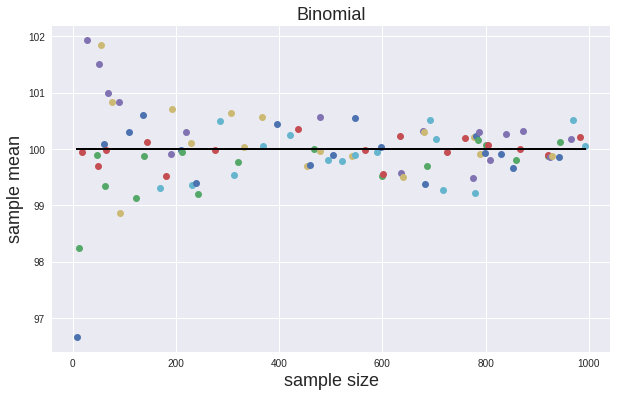

In [17]:
md['binomial'] = {}

for n in mysize:
    md['binomial'][n] = np.random.binomial(num, p, size=n)

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[num*p,num*p],'k')

**Figure:** We see a clear grouping around the mean as sample size gets above ~200, in coformance with the law of large numbers

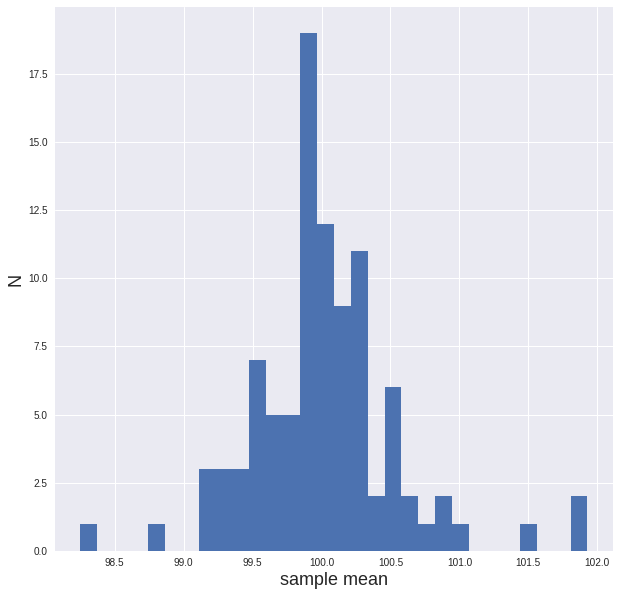

In [18]:
bimeans = list(md['binomial']['means'].values())
pl.figure(figsize=(10, 10))
pl.hist(bimeans[1:], bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

**Figure:** The law of large numbers clearly holds here, as the samples all tend towards the mean. 

# Laplace Distribution

Laplace mean: 99.91, standard deviation: 1.44


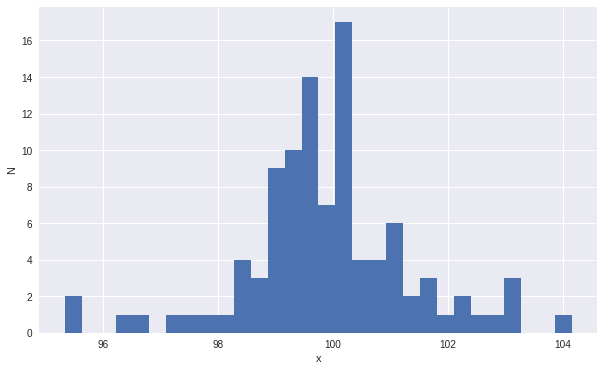

In [19]:
distributions.append('laplace')
mymean = 100
loc = mymean
np.random.seed(100)
md ['laplace'] = np.random.laplace(loc, size=100)
pl.hist(md['laplace'], bins=30)
pl.ylabel('N')
pl.xlabel('x')
print ("Laplace mean: %.2f, standard deviation: %.2f"\
       %(md['laplace'].mean(), md['laplace'].std()))

In [20]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[778 779 610 309 697 859 625 982 976 166  23 160 923 953 210 360 549 271
 460 696 500 716 525   1 394 492 402 354 500 445  90 273 943  26  39 283
 582 990 992 993 110 664 523 173 942 241 998 582 183 386 189 410 594 716
 486 309 577 441 359 321 208 451 491 899 729 770 375 343 655 711 113 133
 456 159 961 837 520 218 134 979 707 859 387 250 299 856 472 663 805 252
  79 732 961 953 490 632 732 902 162 405] (100,)


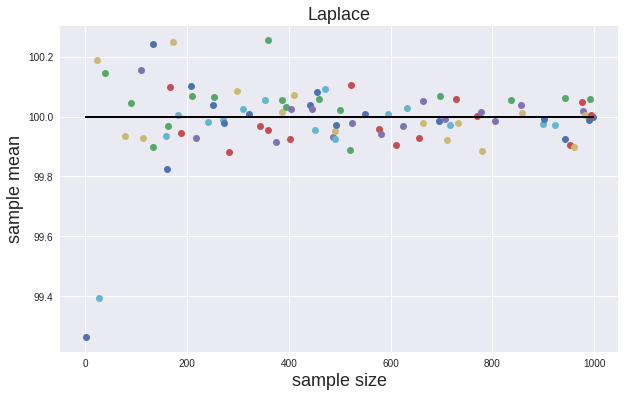

In [21]:
md['laplace'] = {}

for n in mysize:
    md['laplace'][n] = np.random.laplace(loc, size=n)

md['laplace']['means'] = {}
axchisq_mu_n = pl.figure(figsize(10,6)).add_subplot(111)

for nn in md['laplace']:
    if not type(nn) == str:
        md['laplace']['means'][nn] = md['laplace'][nn].mean()
        axchisq_mu_n.plot(nn, md['laplace']['means'][nn],'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Laplace', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)],[num*p,num*p],'k')

**Figure:** Some random noise for the smaller sample sizes, but a remarkably consistant trend towards conformity as the samples get bigger, in accordance with the law of large numbers.

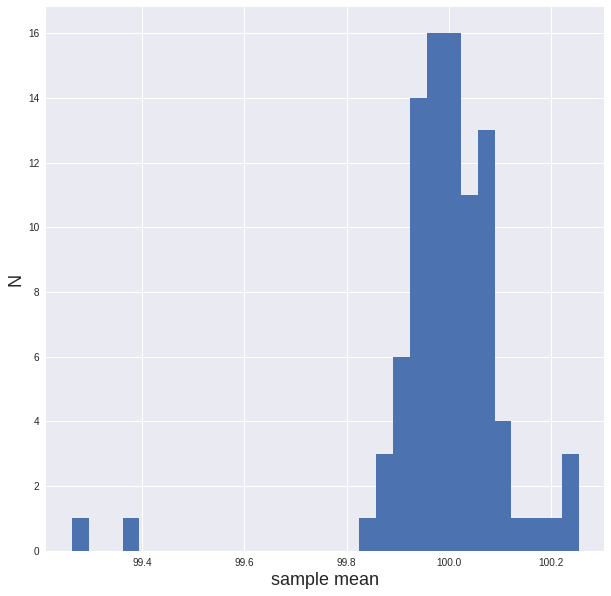

In [22]:
lameans = list(md['laplace']['means'].values()) 
pl.figure(figsize=(10, 10))
pl.hist(lameans, bins=30)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

**Figure:** While there may seem to be a bit of a skew here, it is remarkably consistant with the law of large numbers, centering around the mean. 

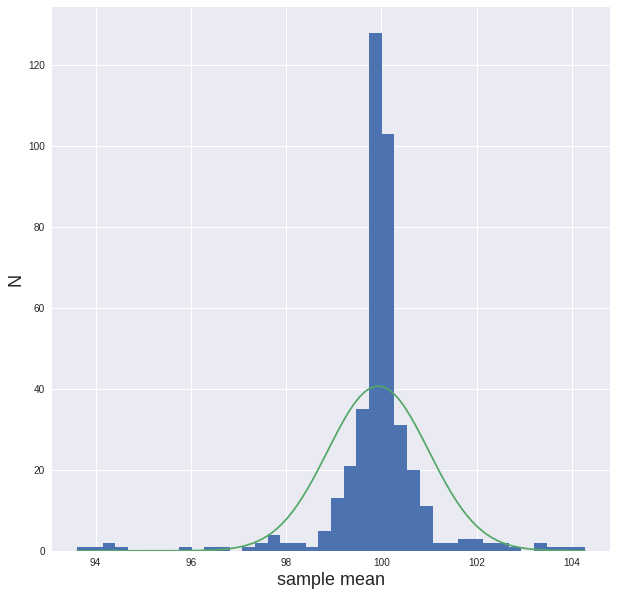

In [23]:
import matplotlib.mlab as mlab
allmeans = []
[allmeans.append(i) for i in chimeans]
[allmeans.append(i) for i in normmeans]
[allmeans.append(i) for i in poismeans]
[allmeans.append(i) for i in bimeans]
[allmeans.append(i) for i in lameans]

pl.figure(figsize=(10, 10))
result = pl.hist(allmeans, bins=40)
pl.xlabel('sample mean', fontsize=18)
pl.ylabel('N', fontsize=18)

mu = np.mean(allmeans)
variance = np.var(allmeans)
sigma = np.sqrt(variance)
x = np.linspace(min(allmeans), max(allmeans), 100)
dx = result[1][1]-result[1][0]
scale = len(allmeans)*dx
gauss = pl.plot(x, mlab.normpdf(x, mu, sigma)*scale)

**Figure:** We observe that, to an even greater extent, stacking the distributions atop each other leads to an overwhelming trend towards the true mean (as should be unsurprising). This conforms even more with the law of large numbers, as the cumulative samples plotted is much more than each distribution shown above. We can thus be fairly certain that the law of large numbers holds true for most distributions and in combination of most distributions with the same mean. 